In [44]:
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import os
import pickle
import re
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.densenet import DenseNet201, preprocess_input
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tqdm import tqdm
import os
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from google.colab import drive
import cv2

In [2]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [95]:
saved_model_path = 'drive/MyDrive/DeepLearninng/caption_model.h5'
caption_model1 = load_model(saved_model_path)

In [96]:
# Load tokenizer (ensure it's the same as used during training)
with open('drive/MyDrive/DeepLearninng/tokenize.pkl', 'rb') as f:
    tokenizer1 = pickle.load(f)

In [97]:
# Load the trained model
saved_model_path = 'drive/MyDrive/DeepLearninng/model.h5'
caption_model2 = load_model(saved_model_path)

# Load the tokenizer
tokenizer_path = 'drive/MyDrive/DeepLearning/tokenizer.pkl'
with open(tokenizer_path, 'rb') as f:
    tokenizer2 = pickle.load(f)

In [89]:
vgg_model = VGG16()
# Remove the last layer to get features directly from the second last layer
vgg_feature_extractor = Model(inputs=vgg_model.input, outputs=vgg_model.layers[-2].output)

In [8]:
# Define the feature extractor model
base_model = DenseNet201()
fe = Model(inputs=base_model.input, outputs=base_model.layers[-2].output)


82524592/82524592 [==============================] - 1s 0us/step


In [11]:
# Function to preprocess a custom image
def preprocess_image(image_path):
    image = load_img(image_path, target_size=(224, 224))
    image = img_to_array(image)
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    image = preprocess_input(image)
    return image

In [9]:
# Function to generate caption for a custom image
def generate_caption1(caption_model, tokenizer, image_features, max_length):
    # Start with the initial input '<start>'
    in_text = '<start>'
    for _ in range(max_length):
        # Encode the input sequence
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        # Pad sequences to fixed length
        sequence = pad_sequences([sequence], maxlen=max_length)
        # Predict the next word
        yhat = caption_model.predict([image_features, sequence], verbose=0)
        yhat = np.argmax(yhat)
        # Map predicted word index to word
        word = word_for_id(yhat, tokenizer)
        if word is None:
            break
        # Append as input for generating the next word
        in_text += ' ' + word
        # Break if the end of the caption is predicted
        if word == '<end>':
            break
    return in_text

In [10]:
# Function to generate a caption for a custom image
def generate_caption2(model, tokenizer, photo, max_length):
    in_text = 'startseq'
    for _ in range(max_length):
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        sequence = pad_sequences([sequence], maxlen=max_length)
        yhat = model.predict([photo, sequence], verbose=0)
        yhat = np.argmax(yhat)
        word = word_for_id(yhat, tokenizer)
        if word is None:
            break
        in_text += ' ' + word
        if word == 'endseq':
            break
    return in_text.replace('startseq ', '').replace(' endseq', '')

In [13]:
# Function to map integer to word
def word_for_id(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None

In [59]:
from pathlib import Path

import matplotlib as mpl


fpath = Path(mpl.get_data_path(), "fonts/ttf/cmr10.ttf")
mpl.font_manager.fontManager.addfont(str(fpath))
plt.show()

In [63]:
import matplotlib.font_manager as fm

# Load custom font for plotting captions
font_path = 'HelloGraduationSans-d9enl.ttf'  # Replace with your font file
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 5

In [72]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img



def plot_image_caption1(image_path, caption):
    # Load and plot image
    image = load_img(image_path)
    plt.imshow(image)
    plt.axis('off')

    # Format caption
    caption = caption.replace('<start>', '').replace('<end>', '')


    # Use the custom font for the title and increase font size
    plt.title("Model01 - " + caption, loc='center', wrap=True, fontproperties=font_prop)

In [69]:
def plot_image_caption2(image_path, caption):
     # Load and plot image
    image = load_img(image_path)
    plt.imshow(image)
    plt.axis('off')

    # Format caption
    caption = caption.replace('<start>', '').replace('<end>', '')

    # Use the custom font for the title and increase font size
    plt.title("Model02 - " + caption, loc='center', fontproperties=font_prop)


In [102]:
if __name__ == "__main__":

    maximum_length = 10
def generate1(image_path):

    image_path = image_path
    custom_image = preprocess_image(image_path)
    image_features = vgg_feature_extractor.predict(custom_image, verbose=0)
    caption = generate_caption1(caption_model1, tokenizer1, image_features, maximum_length)

    plot_image_caption1(image_path, caption)

In [24]:
def generate2(image_path):
    custom_image = preprocess_image(image_path)
    image_features = fe.predict(custom_image, verbose=0)
    caption = generate_caption2(caption_model2, tokenizer2, image_features, max_length=34)
    plot_image_caption2(image_path, caption)

Saving 128912885_8350d277a4.jpg to 128912885_8350d277a4 (2).jpg


<ipython-input-103-694b3b0fc342>:16: UserWarning: Glyph 45 (-) missing from current font.
  plt.tight_layout()


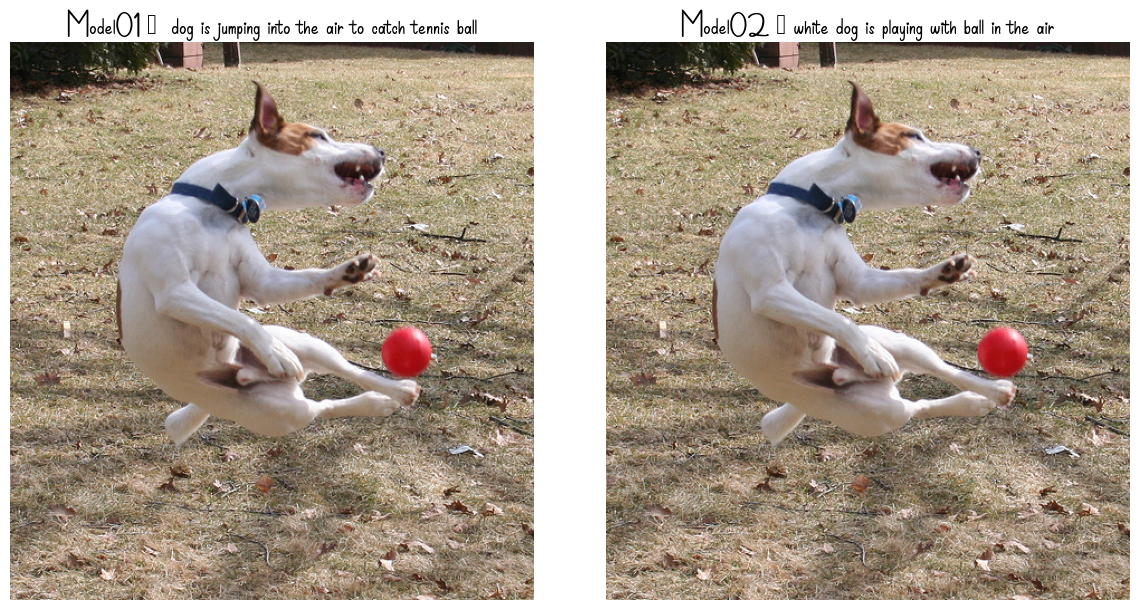

In [103]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img

from google.colab import files
uploaded = files.upload()
image_path = next(iter(uploaded.keys()))

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
generate1(image_path)

plt.subplot(1, 2, 2)
generate2(image_path)

plt.tight_layout()
plt.show()




Saving 3214579977_fa9fb006a6.jpg to 3214579977_fa9fb006a6.jpg


<ipython-input-108-53e46929b019>:16: UserWarning: Glyph 45 (-) missing from current font.
  plt.tight_layout()


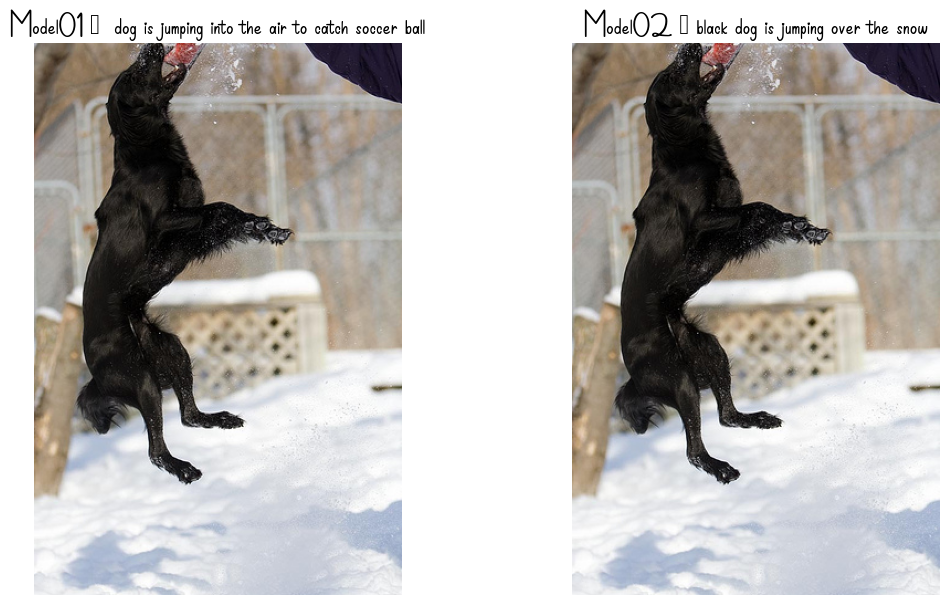

In [108]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img

from google.colab import files
uploaded = files.upload()
image_path = next(iter(uploaded.keys()))

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
generate1(image_path)

plt.subplot(1, 2, 2)
generate2(image_path)

plt.tight_layout()
plt.show()


Saving 2053733930_e245615ad4.jpg to 2053733930_e245615ad4.jpg


<ipython-input-109-53e46929b019>:16: UserWarning: Glyph 45 (-) missing from current font.
  plt.tight_layout()


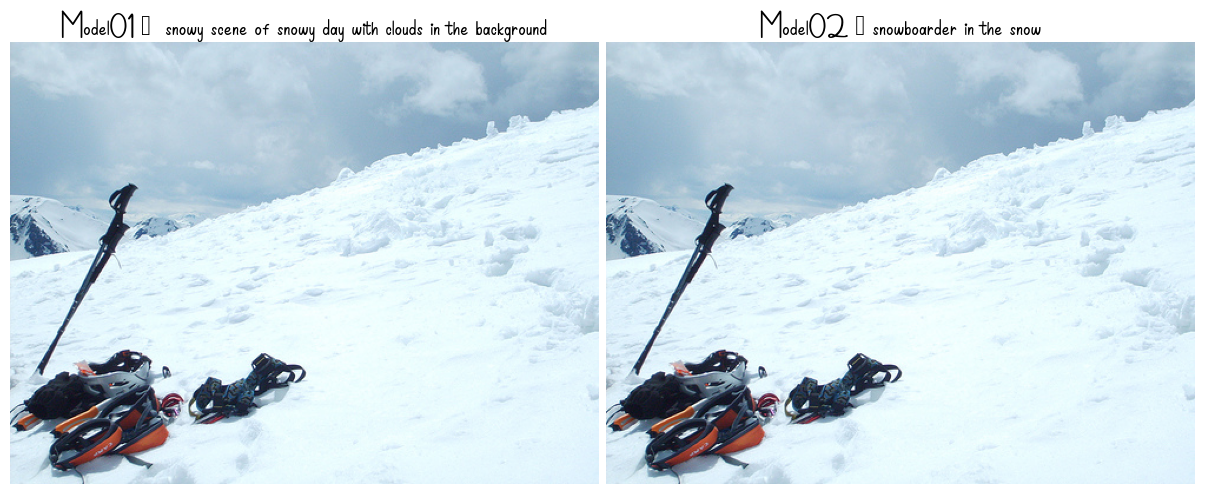

In [109]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img

from google.colab import files
uploaded = files.upload()
image_path = next(iter(uploaded.keys()))

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
generate1(image_path)

plt.subplot(1, 2, 2)
generate2(image_path)

plt.tight_layout()
plt.show()
